In [2]:
%cd ..

/home/zarizky/projects/neural-autoregressive-object-co-occurrence


In [25]:
import utils
import pandas as pd

from pgmpy.estimators import TreeSearch
from einet_addons.forest import gather_nodes

import networkx as nx

from IPython.display import Image

In [5]:
df_train = pd.read_csv("dataset/coco2017-cooccurences-train.csv").iloc[:, 8:]
df_train.columns = [
    col.split("-")[0].replace("[", "").replace("]", "").upper().replace(" ", "\n")
    for col in df_train.columns
]

df_valid = pd.read_csv("dataset/coco2017-cooccurences-valid.csv").iloc[:, 8:]
df_valid.columns = df_train.columns

BIN_G, BN = utils.bin_g.load(
    "outputs/backup/coco2017_bin_20-Jun-2023.mat", df_train, add_bracket=True
)

In [10]:
CLT = TreeSearch(df_train).estimate(estimator_type="chow-liu")

Building tree:   0%|          | 0/3160.0 [00:00<?, ?it/s]

In [33]:
clt_scopes = gather_nodes(CLT, 'TV')
bin_g_scopes = gather_nodes(BIN_G, '104 [2]')

In [34]:
clt_sub = CLT.subgraph(clt_scopes)
bin_g_sub = BIN_G.subgraph(bin_g_scopes)

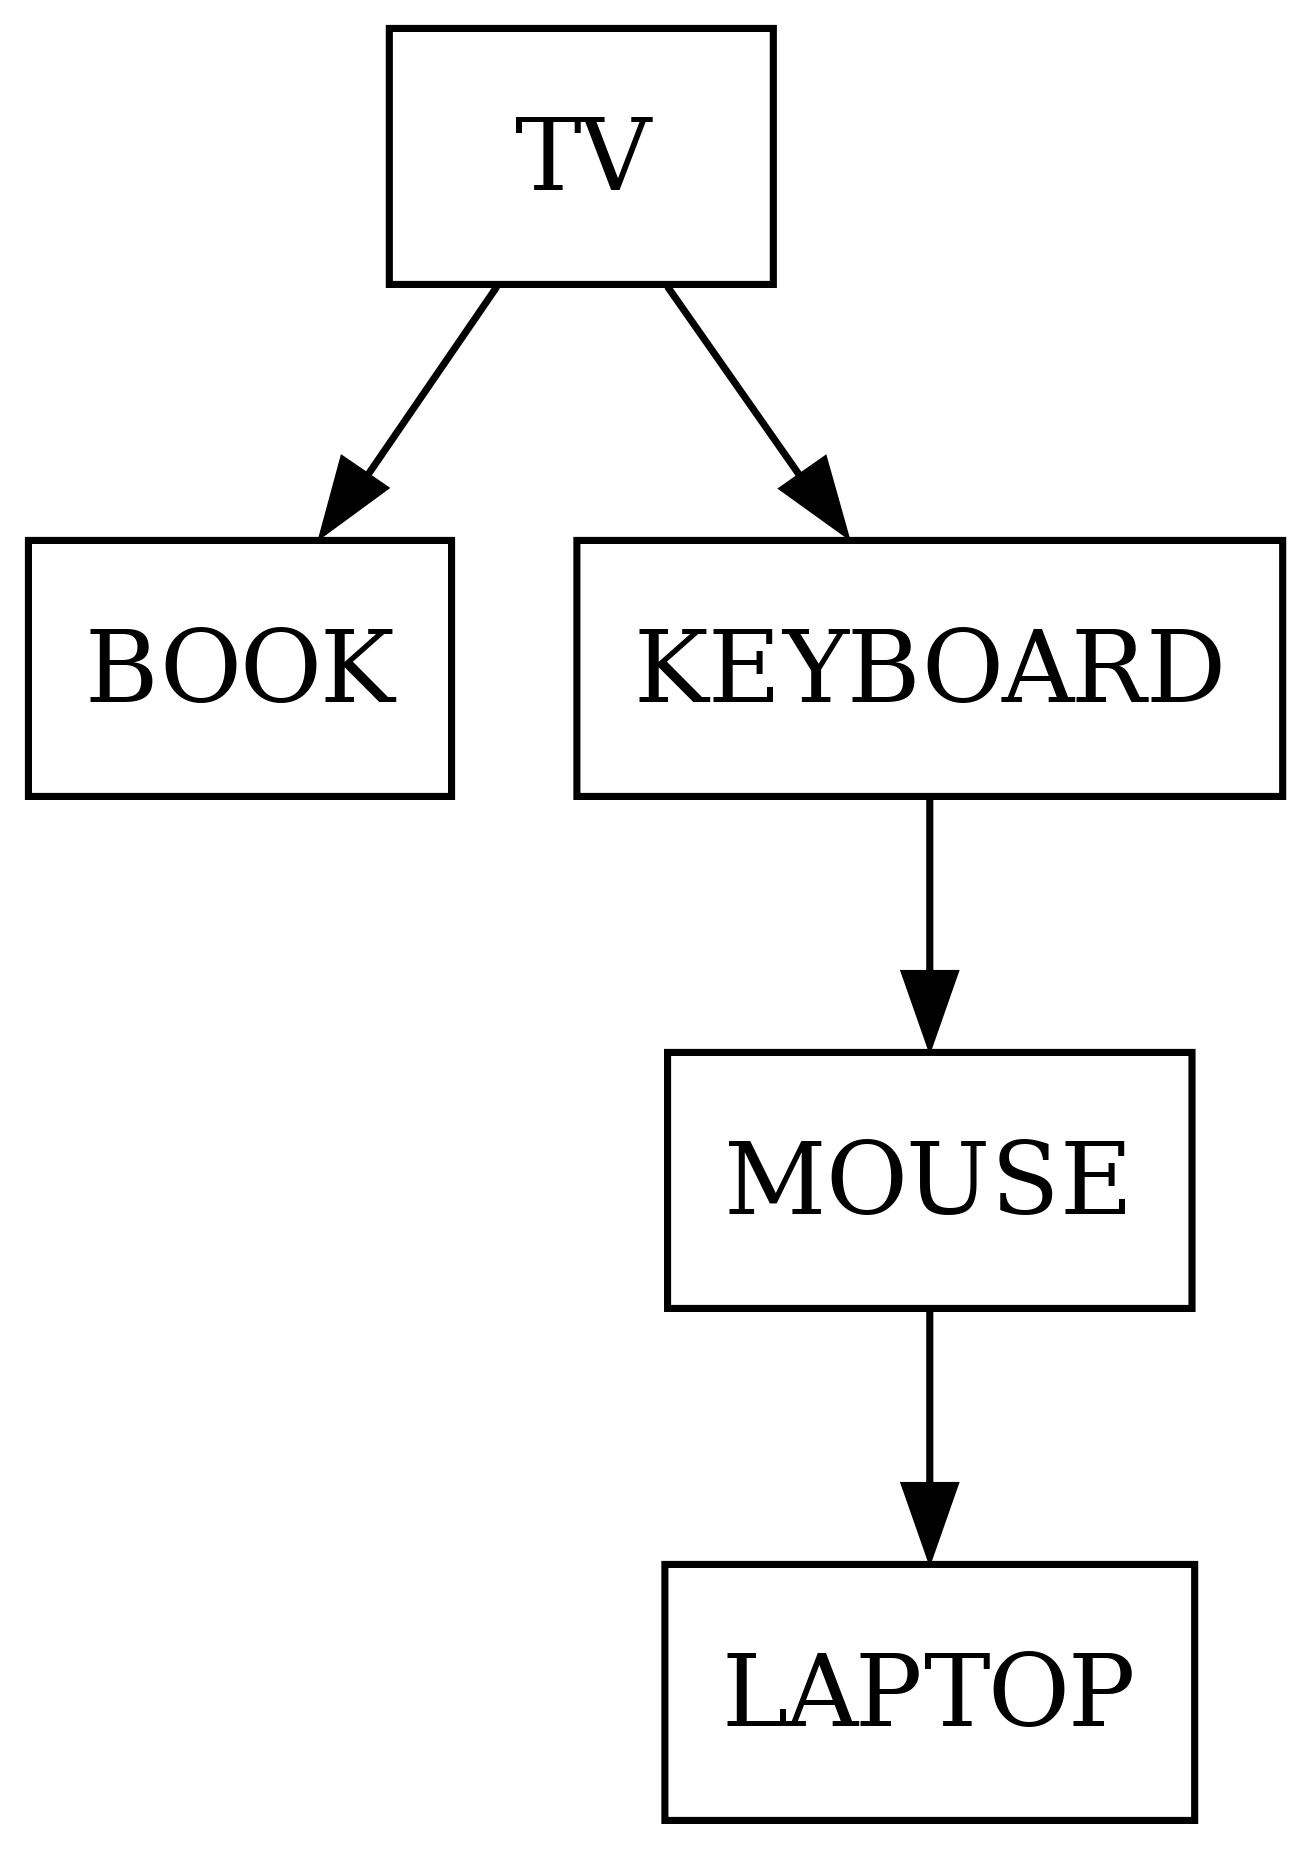

In [31]:
pgv = nx.nx_agraph.to_agraph(clt_sub)

pgv.graph_attr['start'] = 0

pgv.graph_attr['clusterrank'] = 'local'
#pgv.graph_attr["ratio"] = "0.5"
pgv.graph_attr["dpi"] = 512
pgv.graph_attr["overlap"] = "false"
pgv.graph_attr["margin"] = "0"
pgv.node_attr["shape"] = "box"
pgv.draw("outputs/structural_graphs/clt_sample.png", prog="dot")
pgv.draw("outputs/structural_graphs/clt_sample.pdf", prog="dot")

display(Image("outputs/structural_graphs/clt_sample.png"))

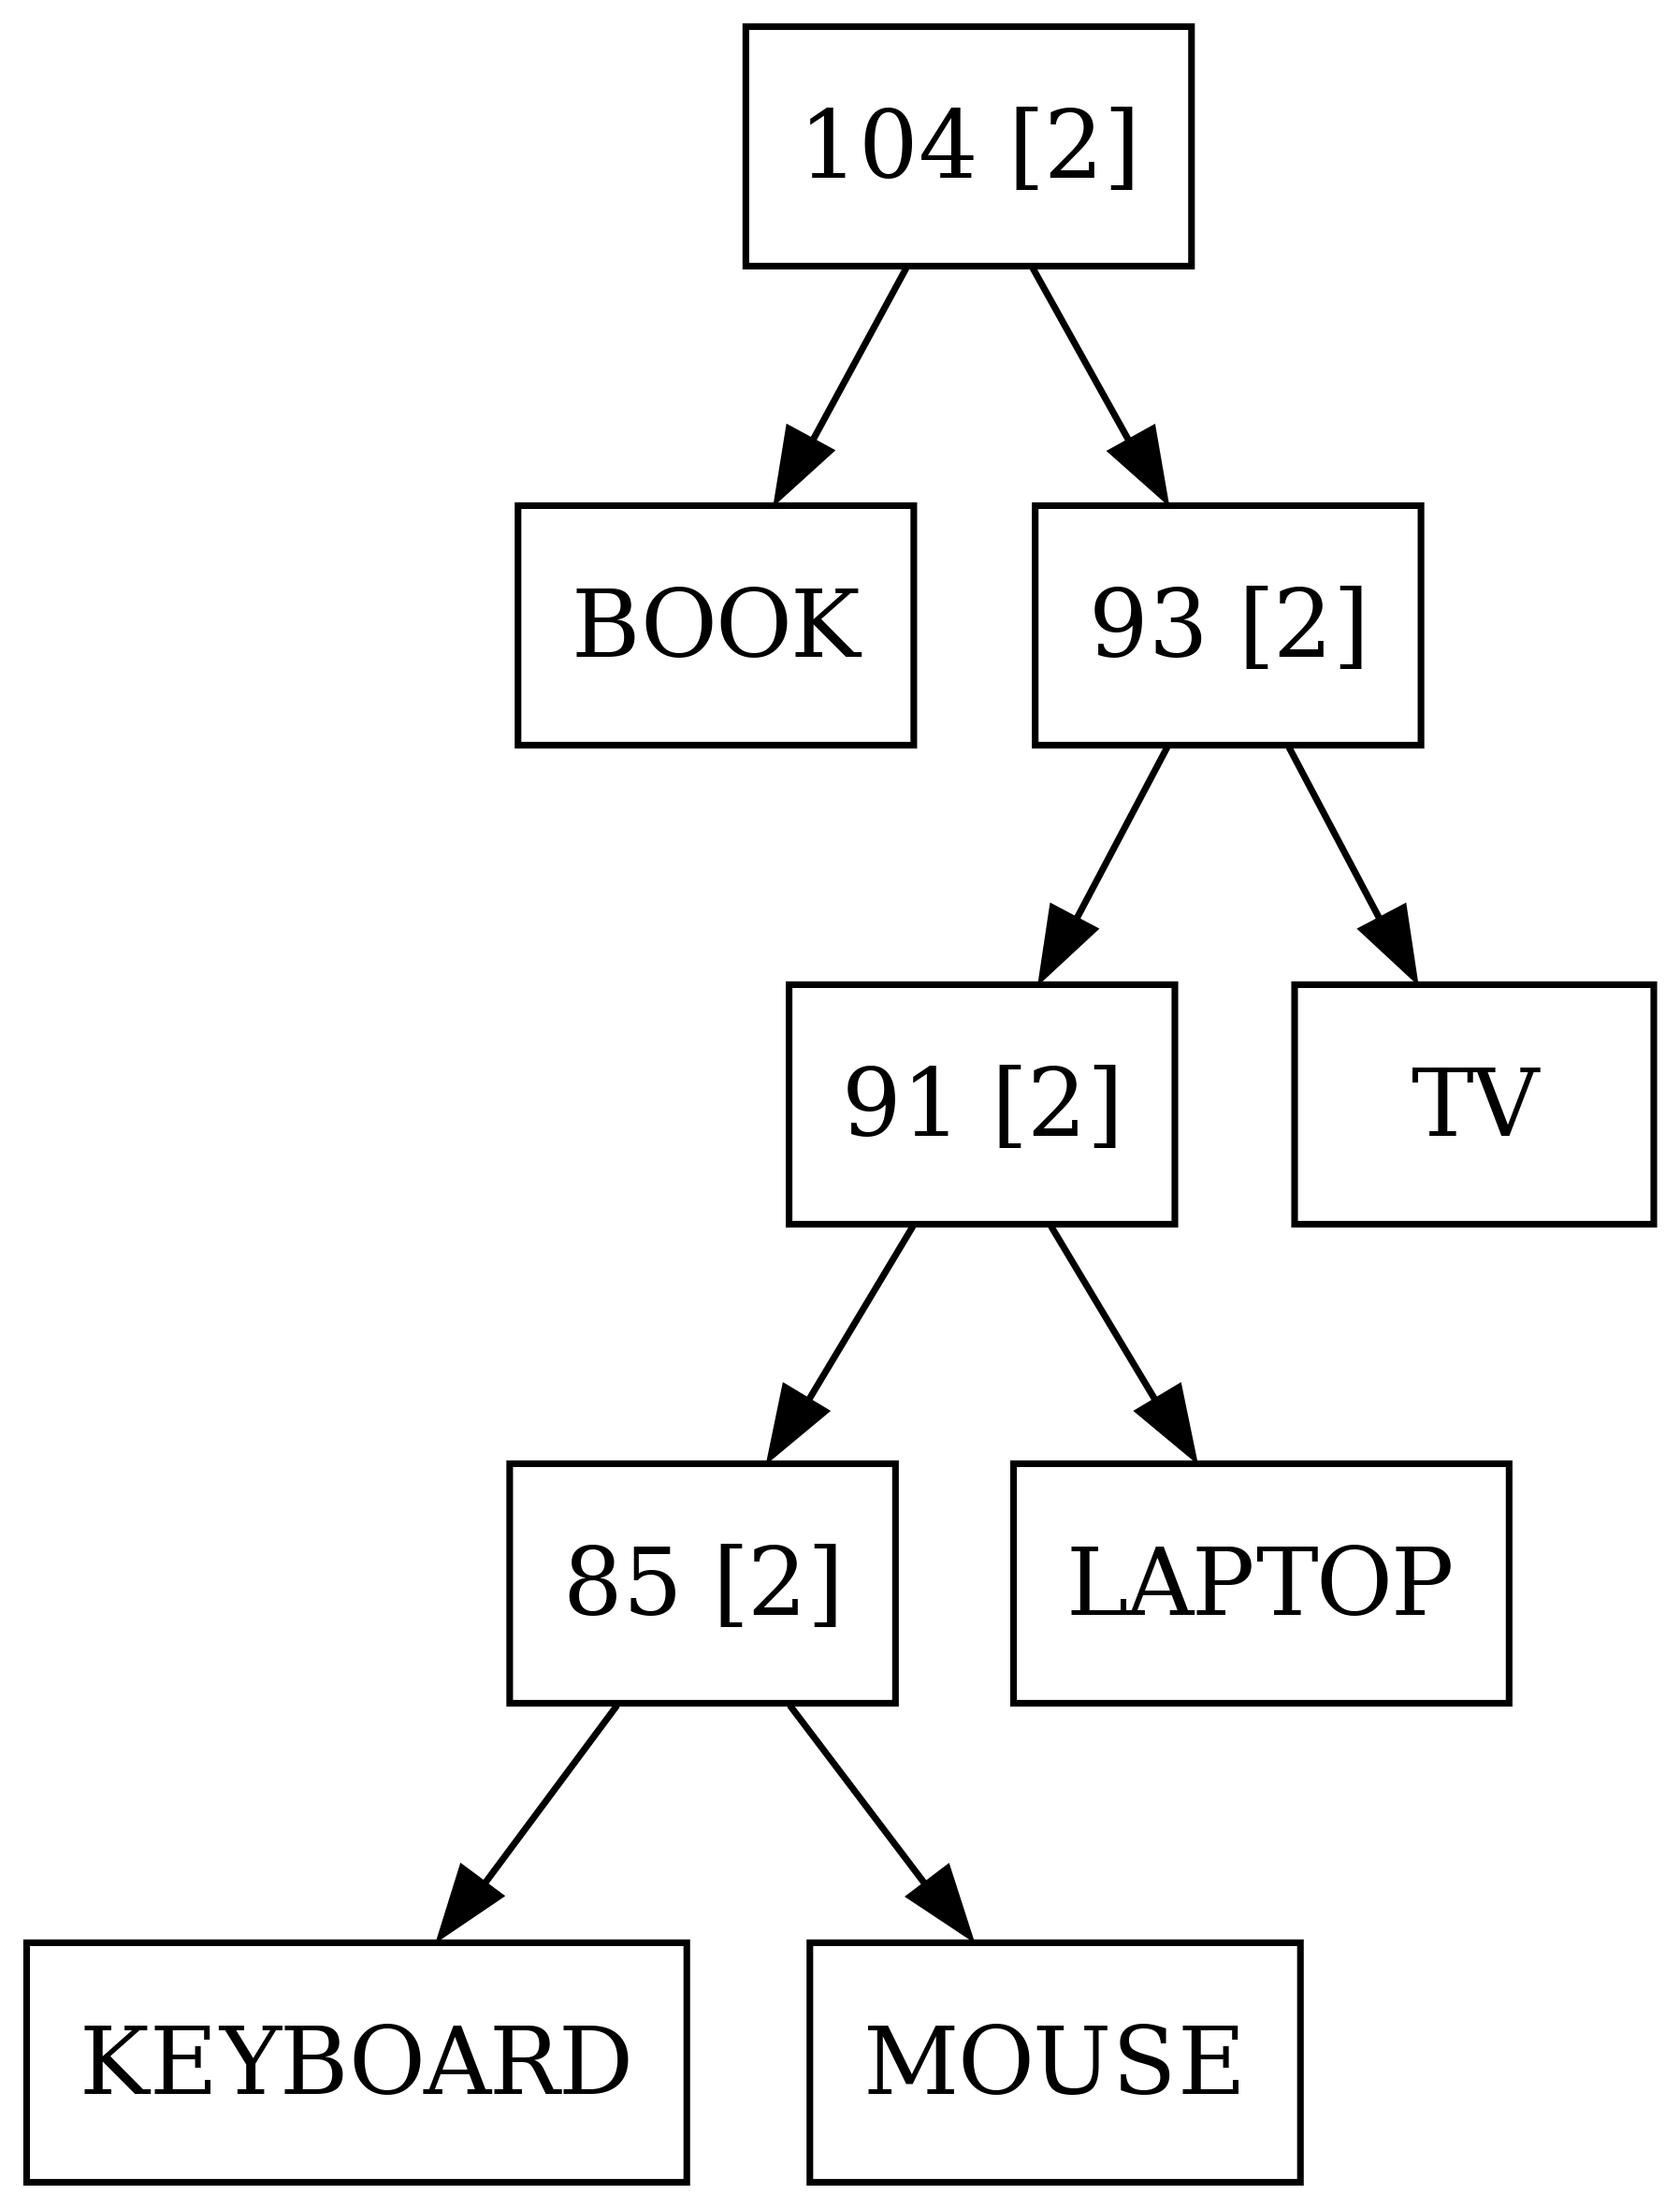

In [35]:
pgv = nx.nx_agraph.to_agraph(bin_g_sub)

pgv.graph_attr['start'] = 0

pgv.graph_attr['clusterrank'] = 'local'
#pgv.graph_attr["ratio"] = "0.5"
pgv.graph_attr["dpi"] = 512
pgv.graph_attr["overlap"] = "false"
pgv.graph_attr["margin"] = "0"
pgv.node_attr["shape"] = "box"
pgv.draw("outputs/structural_graphs/bin_g_sample.png", prog="dot")
pgv.draw("outputs/structural_graphs/bin_g_sample.pdf", prog="dot")

display(Image("outputs/structural_graphs/bin_g_sample.png"))